# Udacity Machine Learning Engineer Nanodegree

## Unsupervised Learning: Creating Customer Segments

This is the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided to us by Udacity, and it will be our job to implement the additional functionality necessary to successfully complete this project. However, in addition to the implementation sections that was required by Udacity I also completed addtional Bonus Sections as well as added extra visualizations from my own study and understanding.

## 1. Introduction

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The Wholesale customers Data Set for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). 

<p style="text-align: justify;"><strong>Data Fields</strong></p>
<pre><strong>FRESH:&nbsp;</strong>annual spending (m.u.) on fresh products (Continuous);
<strong>MILK:&nbsp;</strong>annual spending (m.u.) on milk products (Continuous);
<strong>GROCERY:&nbsp;</strong>annual spending (m.u.)on grocery products (Continuous);
<strong>FROZEN:&nbsp;</strong>annual spending (m.u.)on frozen products (Continuous) 
<strong>DETERGENTS_PAPER:&nbsp;</strong>annual spending (m.u.) on detergents and paper products (Continuous)
<strong>DELICATESSEN:&nbsp;</strong>annual spending (m.u.)on and delicatessen products (Continuous); 
<strong>CHANNEL:&nbsp;</strong>customer's Channel - Horeca (Hotel/Restaurant/Caffe) or Retail channel (Nominal) 
<strong>REGION:&nbsp;</strong>customer's Region Lisnon, Oporto or Other (Nominal)
</pre>

For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

from scipy import stats

# Import supplementary visualizations code visuals.py
#import visuals as vs

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 30)

plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
rnd_seed=23
np.random.seed(rnd_seed)

In [4]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv("data/customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## 2. Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [5]:
# Display a description of the dataset
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


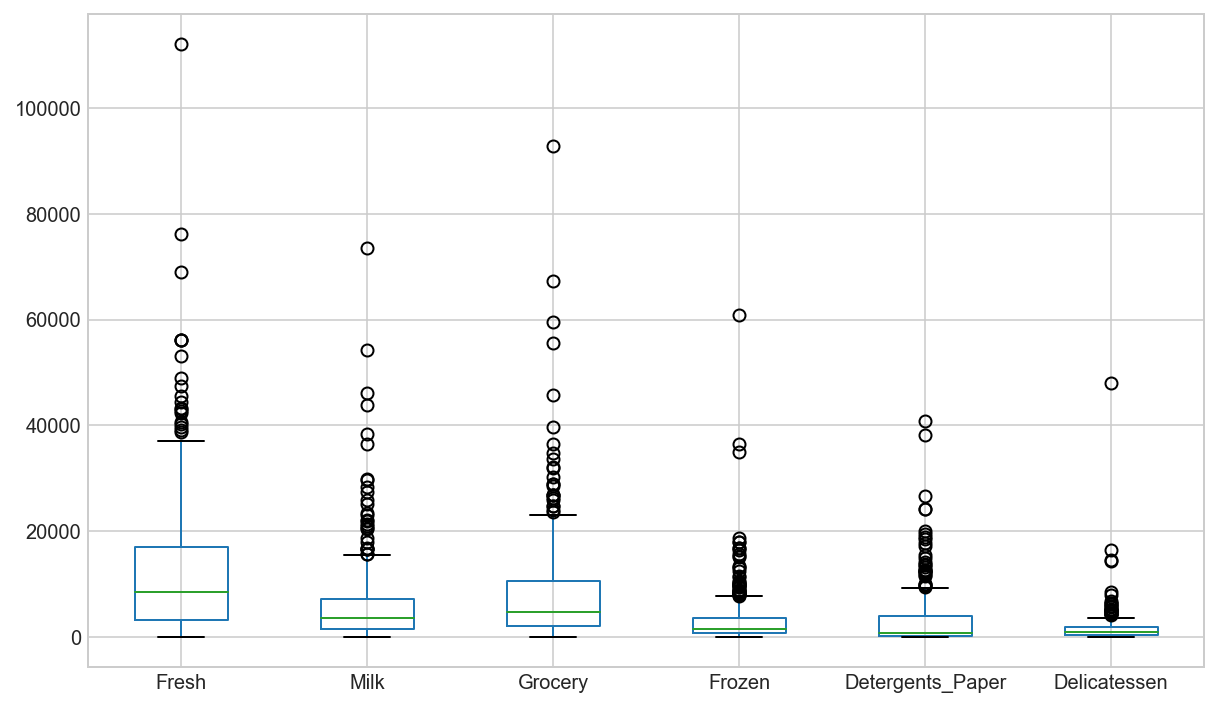

In [6]:
data.boxplot(figsize=(10, 6));

### 2.1. Implementation: Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [7]:
# TODO: Select three indices of to sample from the dataset
indices = [26,176,392]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

print("Chosen samples of wholesale customers dataset:")
samples

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9898,961,2861,3151,242,833
1,45640,6958,6536,7368,1532,230
2,518,4180,3600,659,122,654


#### Question 1 : Guessing Establishments

Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers. 

*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** Looking at the total purchase of each product category above and comparing them with the medians of the distributions, we can guess that: 

- The first customer in the sample (Index 0), might be from a restaurant. We see high amounts of Frozen, close to median amount of Fresh and Deli. So this can be from a restaurant.
- The second customer in the sample (Index 1), might be from a supermarket. We see really high or close to median levels of purchases of all category of products excluding deli. So maybe the supermarket doesn't have a deli section.
- The third customer in the sample (Index 2), might represent a cafe. We see a high purchase of milk and somewhat close to median levels for Groceries and Deli. We also see a relatively lower purchase of fresh produce and frozen goods. 

### 2.2. Implementation: Feature Relevance

One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature. 

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Lets do this for the 'Milk' feature.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Milk'],axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Milk'], test_size=0.25, random_state=rnd_seed)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=rnd_seed).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test) # Returns the coefficient of determination R^2 of the prediction.

In [9]:
print(score)

0.493870361639


#### Question 2: Feature Relevance Prediction

*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** We tried to predict the 'Milk' feature (i.e. annual spending on milk products), based on the other features in the dataset (annual spending on other product categories). 

The predicted R<sup>2</sup> score was 0.4938. As we know that the R<sup>2</sup> is between 0 and 1, the model we built for customer's milk purchasing habits isn't very good, although it is possible that there's some correlation between this feature and others.  

It's safe to say that the 'Milk' feature is necessary for identifying customer's spending habits because it isn't possible to predict how a customer spends on Milk based on their spending on the other product categories. We can say that the 'Milk' feature adds extra (and maybe key) information to the data which is not easily inferable by model only through looking at the other features. 

#### 2.2.1. Bonus Work: Extending the above strategy for all Items

In [10]:
data.keys()

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for item in data.keys():
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([item],axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data,data['Milk'], test_size=0.25, random_state=rnd_seed)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=rnd_seed).fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test) # Returns the coefficient of determination R^2 of the prediction.
    
    print(item, score)

Fresh 0.972974459471
Milk 0.493870361639
Grocery 0.952644860328
Frozen 0.800522882355
Detergents_Paper 0.82023388972
Delicatessen 0.820604270962


**Observation**

*If we check for all of items we can see that "Grocery" & "Fresh" have very high scores. That means it's preety easy to predict these feature with the help of others. We can safely remove these feature without loosing much information.

### 2.3. Visualize Feature Distributions

To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

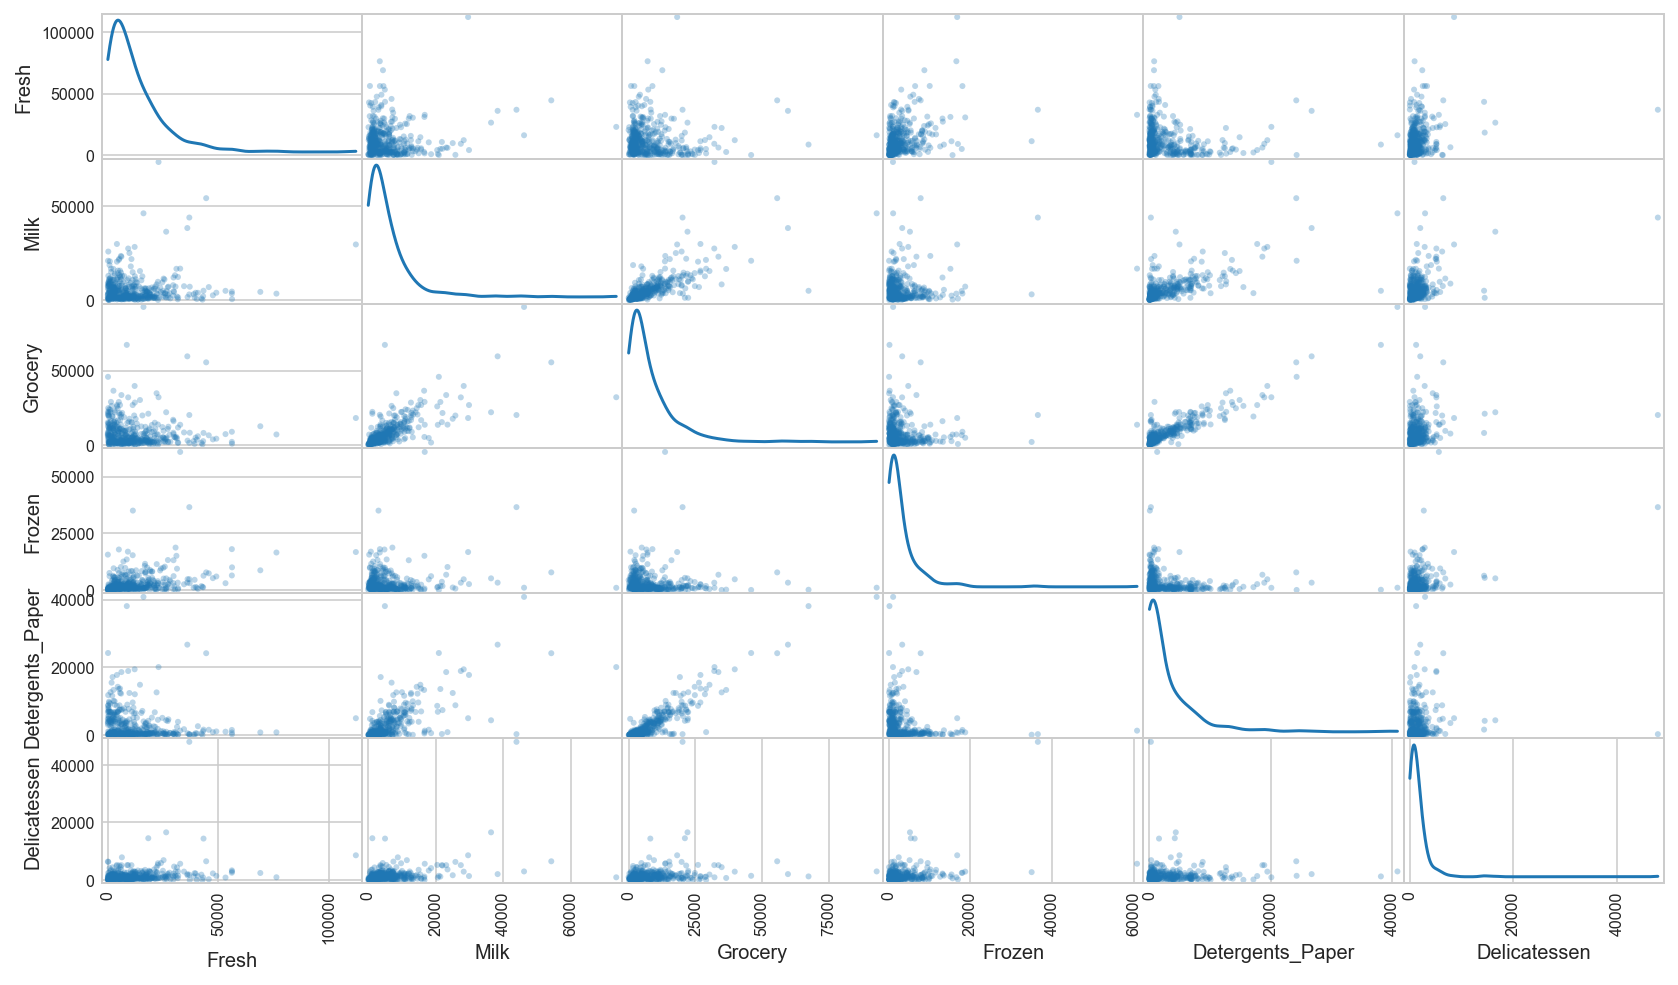

In [12]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### Question 3: Correlations 
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**Looking at the plot above, there are a few pairs of features that exhibit some degree of correlation. They include: 

- Milk and Groceries
- Milk and Detergents_Paper
- Grocery and Detergents_Paper

As we tried to predict the 'Milk' feature earlier, this confirms the suspicion that Milk isn't correlated to most of the features in the dataset, although it shows a mild correlation with 'Groceries' and 'Detergents_Paper'. Which also means that we can get rid of one of them.

The distribution of all the features appears to be similar. It is strongly right skewed, in that most of the data points fall in then first few intervals which means most of the purchase was low. Judging by the summary statistics, especially the mean and maximum value points of the features that we calculated earlier, we can expect that there are some outliers in each of the distributions. This conforms with the fact that there's a significant difference between the mean and the median of the feature distributions and that the median for each variable is pretty smaller than the mean.

## 3. Data Preprocessing

In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### 3.1. Implementation: Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

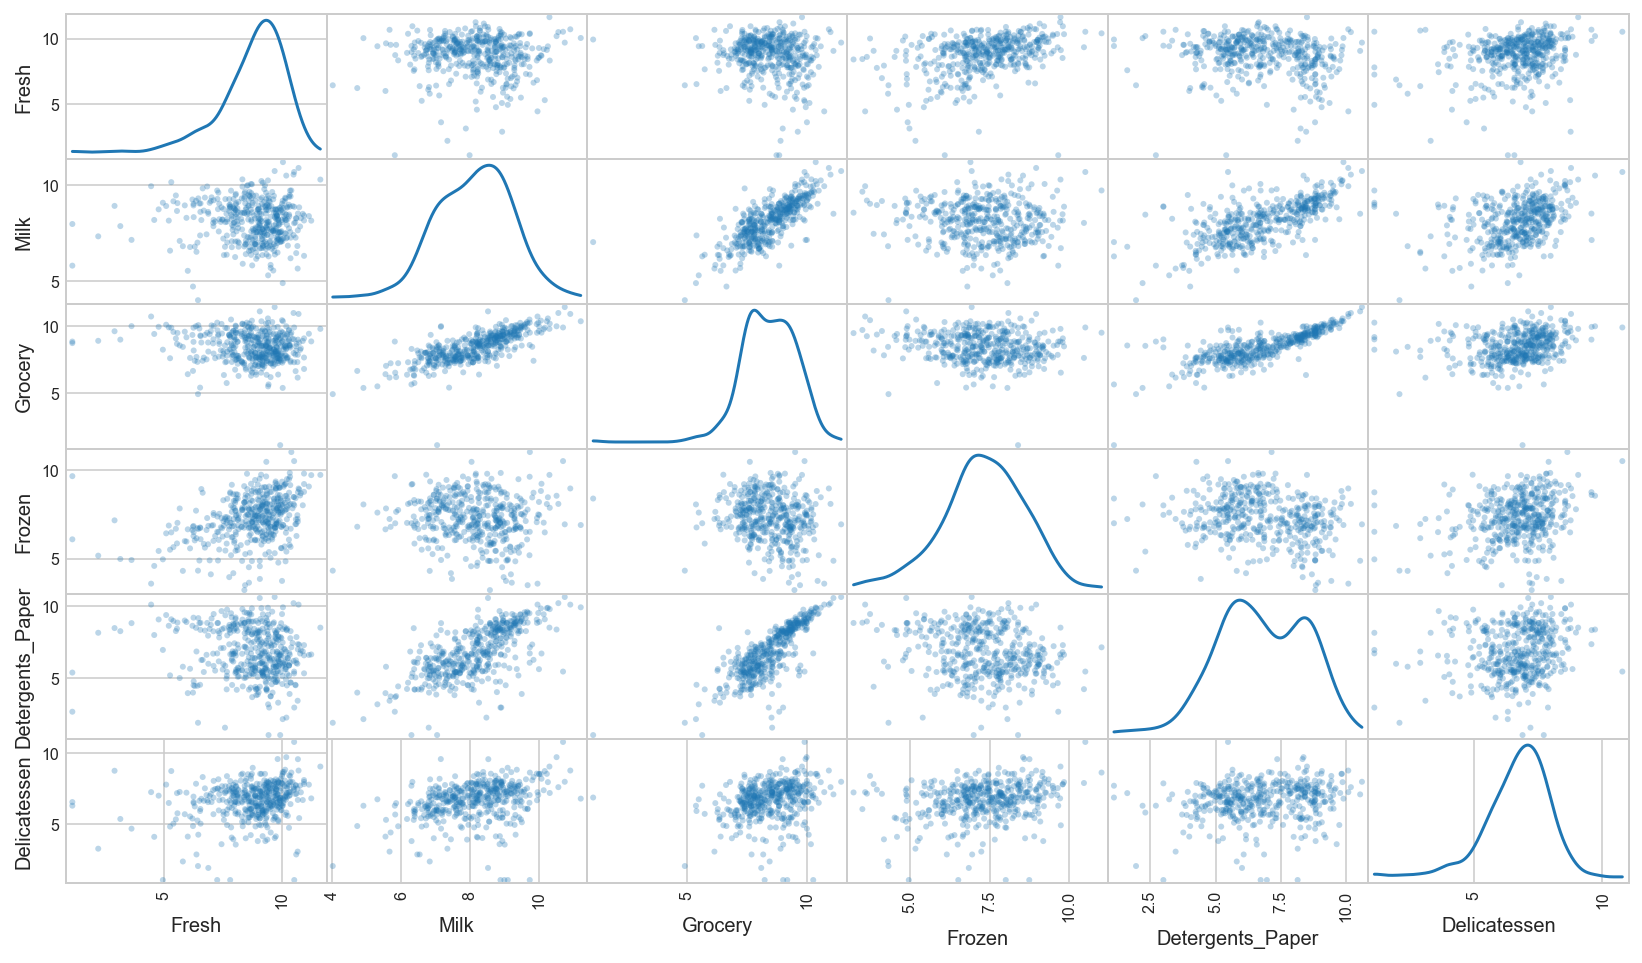

In [13]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
# Display the log-transformed sample data
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.200088,6.867974,7.958926,8.055475,5.488938,6.725034
1,10.728540,8.847647,8.785081,8.904902,7.334329,5.438079
2,6.249975,8.338067,8.188689,6.490724,4.804021,6.483107


### 3.2. Bonus Work: Feature Scaling using the Box-Cox power transformation

http://www.itl.nist.gov/div898/handbook/eda/section3/eda336.htm

Many statistical tests and intervals are based on the assumption of normality. The assumption of normality often leads to tests that are simple, mathematically tractable, and powerful compared to tests that do not make the normality assumption. Unfortunately, many real data sets are in fact not approximately normal. However, an appropriate transformation of a data set can often yield a data set that does follow approximately a normal distribution. This increases the applicability and usefulness of statistical techniques based on the normality assumption.

The Box-Cox transformation is a particulary useful family of transformations. It is defined as:

$$T(Y)=(Y^\lambda−1)/\lambda$$

where $Y$ is the response variable and $\lambda$ is the transformation parameter. For $\lambda$ = 0, the natural log of the data is taken instead of using the above formula.

Given a particular transformation such as the Box-Cox transformation defined above, it is helpful to define a measure of the normality of the resulting transformation. One measure is to compute the correlation coefficient of a [normal probability plot](http://www.itl.nist.gov/div898/handbook/eda/section3/normprpl.htm). 

The normal probability plot is a graphical technique for assessing whether or not a data set is approximately normally distributed. The data are plotted against a theoretical normal distribution in such a way that the points should form an approximate straight line. Departures from this straight line indicate departures from normality, the more linear the probability plot, the better a normal distribution fits the data. 

Let's see normal probability plot for all the features: 

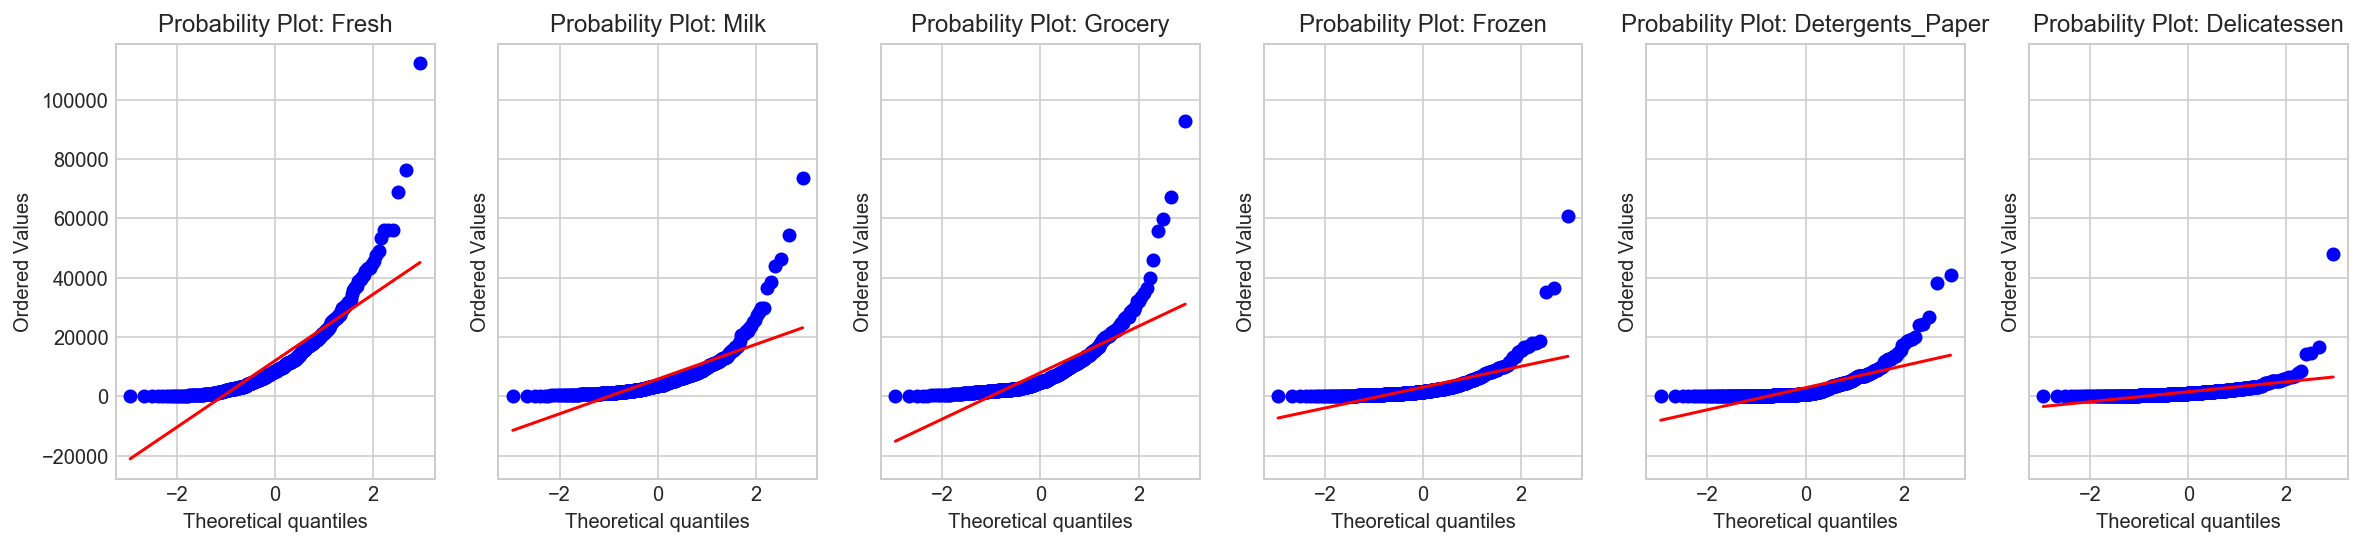

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=6, sharex=False, sharey=True, figsize=(20,4))
for i, item in enumerate(data.keys()):
    prob = stats.probplot(data[item], dist=stats.norm, plot=ax[i])
    _= ax[i].set_title('Probability Plot: {0}'.format(item))

#### Observation

Clearly none of the items form an approximate straight line which implies that all the features are heavily skewed.

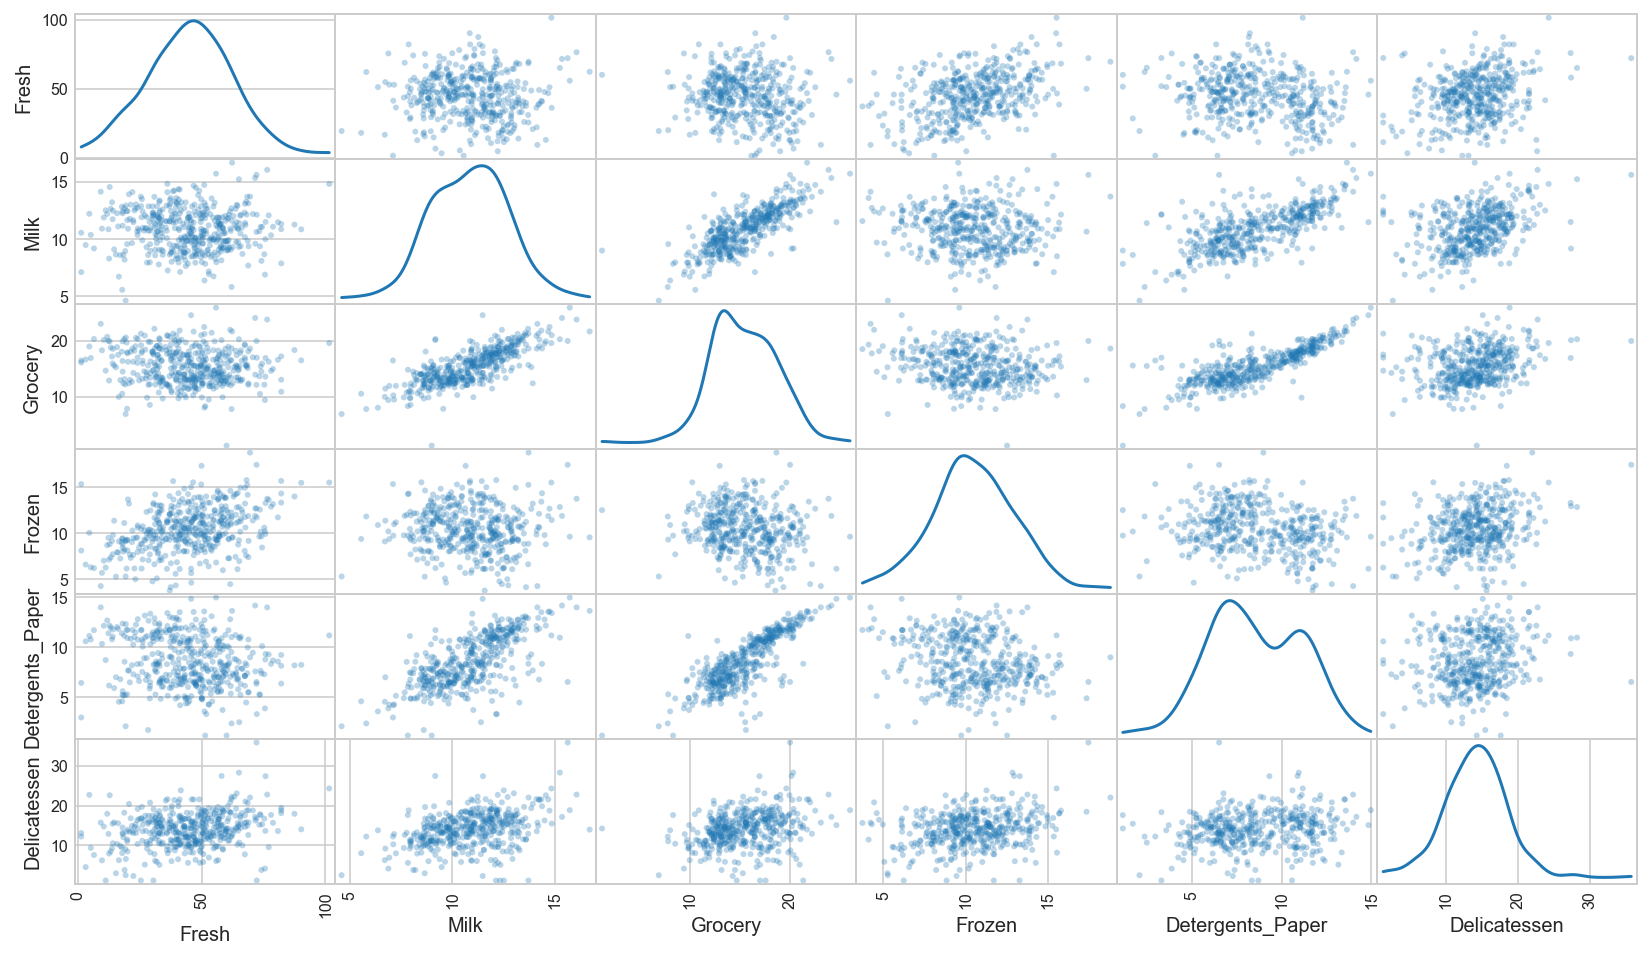

In [16]:
from scipy import stats

# Scale the data using the Box-Cox power transformation
# stats.boxcox(x) Returns a positive dataset transformed by a Box-Cox power transformation. 
# If lmbda is None, find the lambda that maximizes the log-likelihood function and return it as the second output 
# Hence we need to extract[0] from the resulting tuple
normalized_data = data.apply(lambda x: stats.boxcox(x)[0])

# Scale the data using the Box-Cox power transformation
normalized_samples = samples.apply(lambda x: stats.boxcox(x)[0])

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(normalized_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Let's see normal probability plot for all the transformed features:

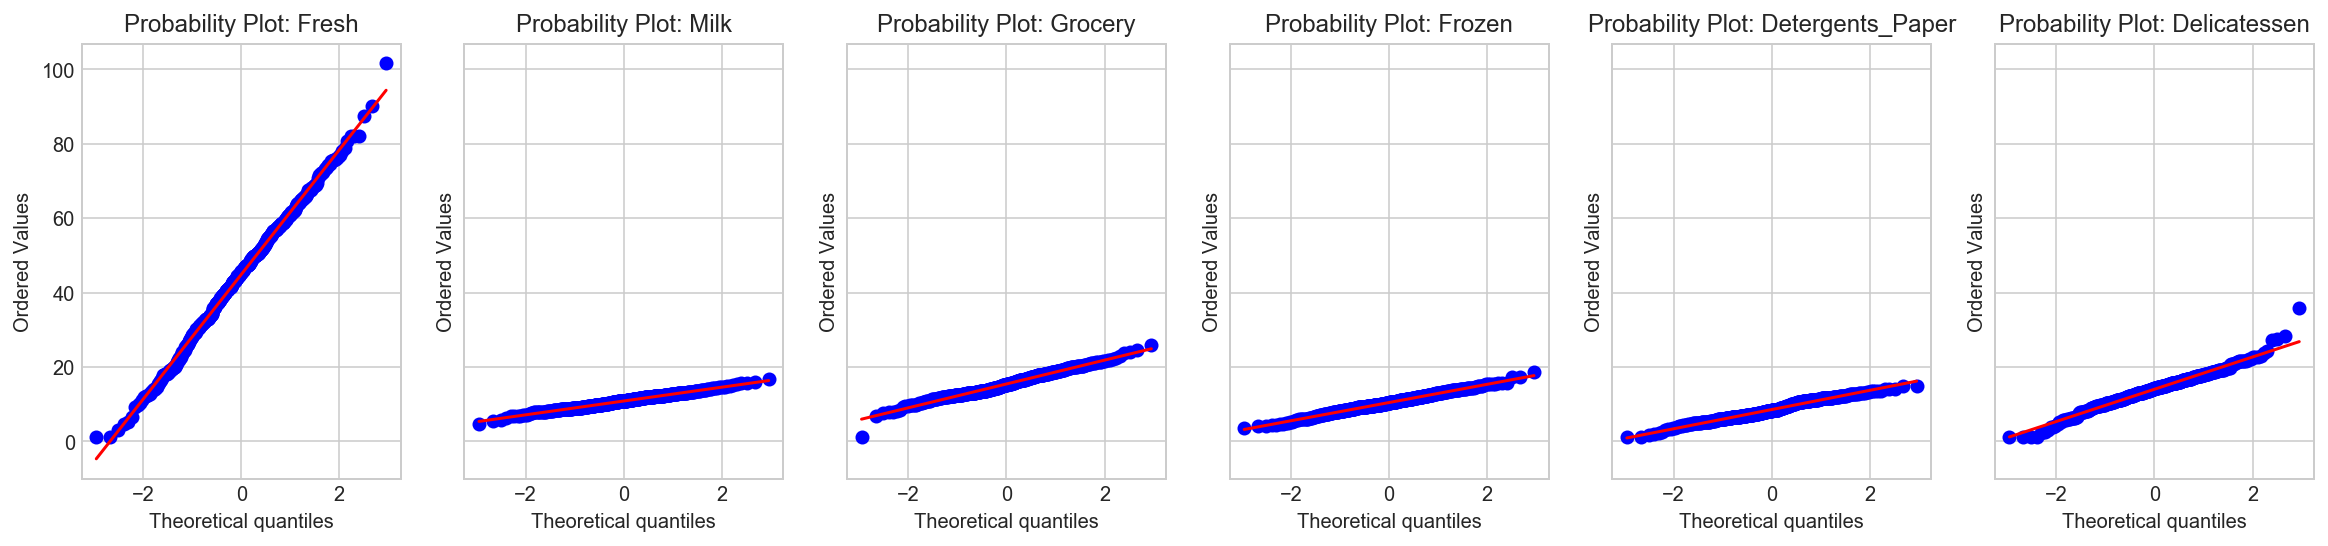

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=6, sharex=False, sharey=True, figsize=(20,4))
for i, item in enumerate(normalized_data.keys()):
    prob = stats.probplot(normalized_data[item], dist=stats.norm, plot=ax[i])
    _= ax[i].set_title('Probability Plot: {0}'.format(item))

#### Observation

Clearly after Box-Cox power transformation all of the items form an approximate straight line which implies that all the features have now been transformed to have a normal distribution.

### 3.3 Outlier Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
# OPTIONAL: Select the indices for data points you wish to remove
all_outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    feature_outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    all_outliers = all_outliers + list(feature_outlier_points.index.values)
    
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(feature_outlier_points)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [19]:
print(all_outliers)

[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


In [20]:
# OPTIONAL: Select the indices for data points you wish to remove   
# Creating list of more outliers which are the same for multiple features.
all_outliers = list([x for x in set(all_outliers) if all_outliers.count(x) > 1])

print("Outliers: {}".format(all_outliers))

# Remove the outliers, if any were specified 
good_data = log_data.drop(log_data.index[all_outliers]).reset_index(drop = True)
print("The good dataset now has {} observations after removing outliers.".format(len(good_data)))

Outliers: [128, 154, 65, 66, 75]
The good dataset now has 435 observations after removing outliers.


#### Question 4: Outlier Removal
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**Upon quick inspection, our sample doesn't contain any of the outlier values.

There were 5 data points that were considered outliers for more than one feature based on our definition above. So, instead of removing all outliers (which would result in us losing a lot of information), only outliers that occur for more than one feature are removed as a pre-processing technique. We should not remove the points which are not considered outliers for at least 2 features. Removing the outliers might affect the assumptions. 

We should be very careful about the preprocessing of the data for outliers while working with k-means because k-means is sensitive to outliers. We could ignore removing clustering if we were working with density based clustering. 

We can also analyse these outliers independently to answer questions about how or when they occur (root cause analysis), but they might not be suitable for an aggregate analysis.  

## 4. Feature Transformation

In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### 4.1. Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

#import visuals as vs
# Generate PCA results plot
#pca_results = vs.pca_results(good_data, pca)

In [22]:
# Dimension indexing
dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
dimensions

['Dimension 1',
 'Dimension 2',
 'Dimension 3',
 'Dimension 4',
 'Dimension 5',
 'Dimension 6']

In [23]:
# PCA components
components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
components.index = dimensions
components

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


In [24]:
# PCA explained variance
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios['Cumulative Explained Variance'] = variance_ratios['Explained Variance'].cumsum()
variance_ratios.index = dimensions
variance_ratios

,Explained Variance,Cumulative Explained Variance
Dimension 1,0.4430,0.4430
Dimension 2,0.2638,0.7068
Dimension 3,0.1231,0.8299
Dimension 4,0.1012,0.9311
Dimension 5,0.0485,0.9796
Dimension 6,0.0204,1.0000


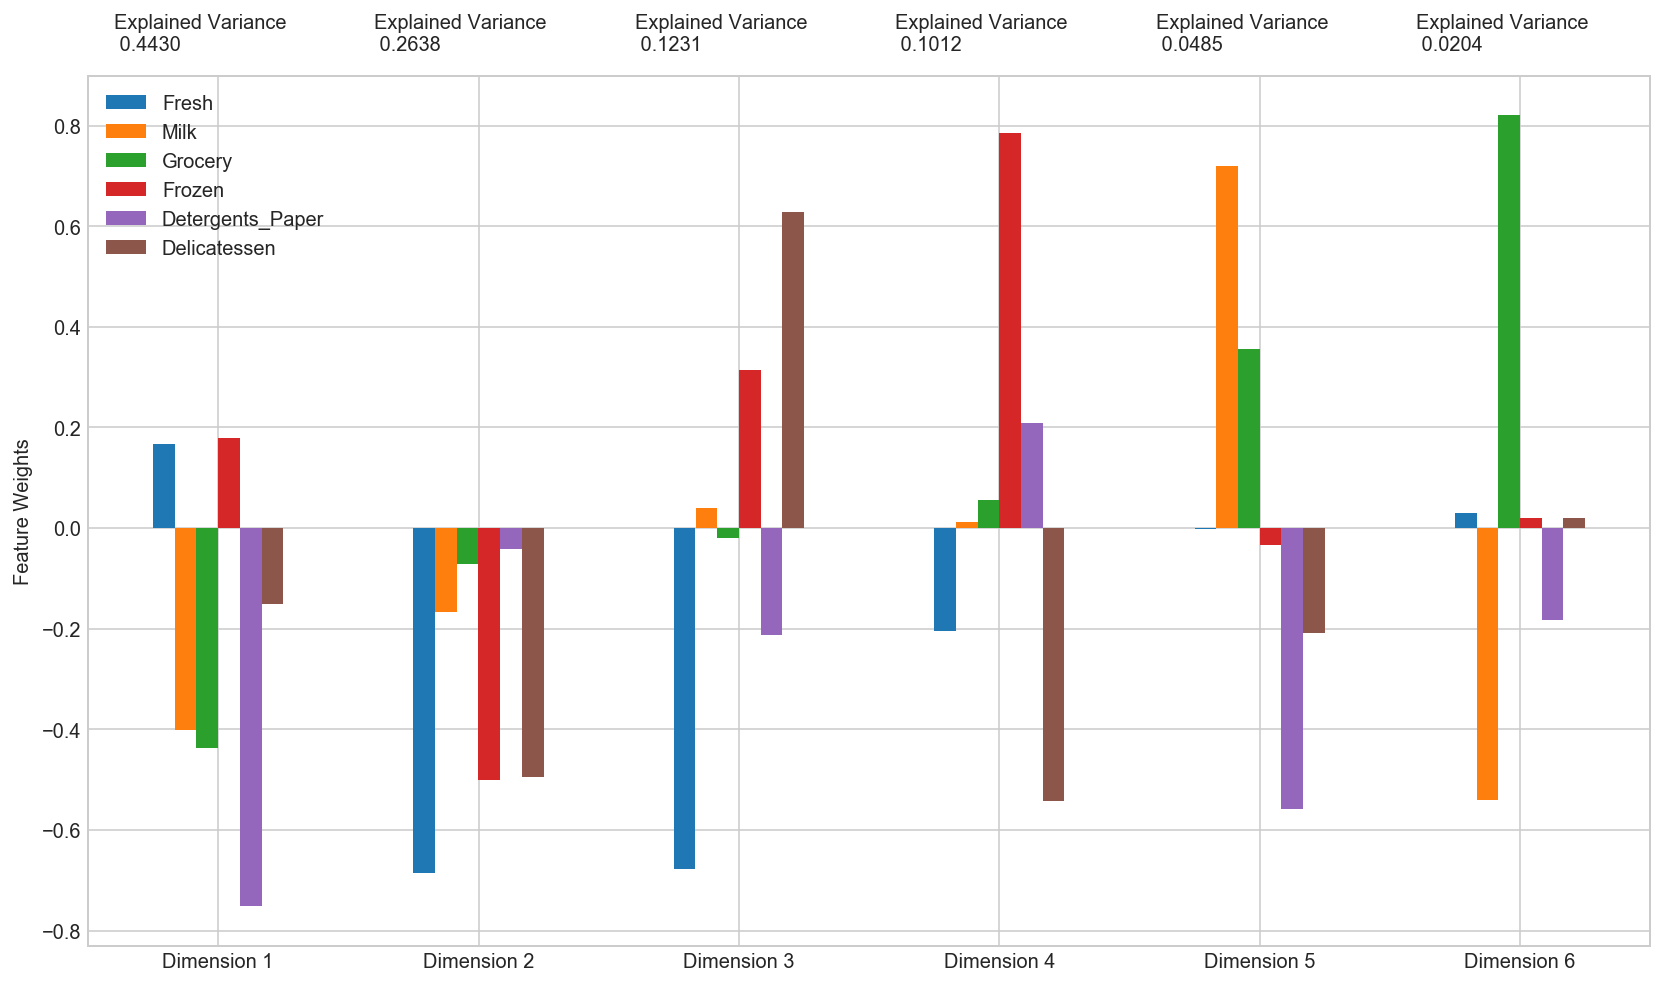

In [25]:
# Plot the feature weights as a function of the components
# Create a bar plot visualization
fig, ax = plt.subplots(figsize = (14,8))
    
_ = components.plot(ax = ax, kind = 'bar')
_ = ax.set_ylabel("Feature Weights")
_ = ax.set_xticklabels(dimensions, rotation=0)

# Display the explained variance ratios
for i, ev in enumerate(pca.explained_variance_ratio_):
    _ = ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

In [26]:
pd.concat([variance_ratios, components], axis=1)

,Explained Variance,Cumulative Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,0.7068,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,0.8299,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,0.9311,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,0.9796,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,1.0000,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


#### Question 5: PCA Inference
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** 

The first and second features, in total, explain approx. 70.8% of the variance in our data.

The first four features, in total, explain approx. 93.11% of the variance. 

In terms of customer spending, 
- **Dimension 1** has a high positive weight for Fresh, Frozen features. This might represent shops that sell frozen goods exclusively e.g. fish & meat.
- **Dimension 2** has a negative weights for everything and its hard to understand what this segment represent. for Fresh, Frozen, and Delicatessen. This dimension might represent 'restaurants', where these items are used for ingredients in cooking dishes. 
- **Dimension 3** has a high positive weight for Frozen and Deli features, but low positive weights for Milk, but has negative weights for everything else. This dimension might represent Delis. 
- **Dimension 4** has high positive weights for Frozen, Detergents_Paper and low positive weights for Milk, Groceries, while being negative for Fresh and Deli. It's a bit tricky to pin this segment down, but I do believe that it may be shops in the gas stations. 

#### Observation

Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [27]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = components.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.9083,-0.3765,0.1924,0.1502,-0.3852,0.5367
1,-0.0349,-1.6819,-1.7115,1.6613,0.5394,-0.1548
2,0.9955,2.3169,1.7454,-0.4569,1.2462,-0.0669


### 4.2. Implementation: Dimensionality Reduction using PCA

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [28]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

#### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [29]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.9083,-0.3765
1,-0.0349,-1.6819
2,0.9955,2.3169


### Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

In [30]:
pca.components_

array([[ 0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613,
        -0.14987105],
       [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398,
        -0.49414702]])

In [31]:
pca.components_.T

array([[ 0.16746374, -0.68593522],
       [-0.40143866, -0.16722783],
       [-0.43811142, -0.07072902],
       [ 0.17820975, -0.50054207],
       [-0.75142613, -0.04244398],
       [-0.14987105, -0.49414702]])

In [32]:
# Create a biplot
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

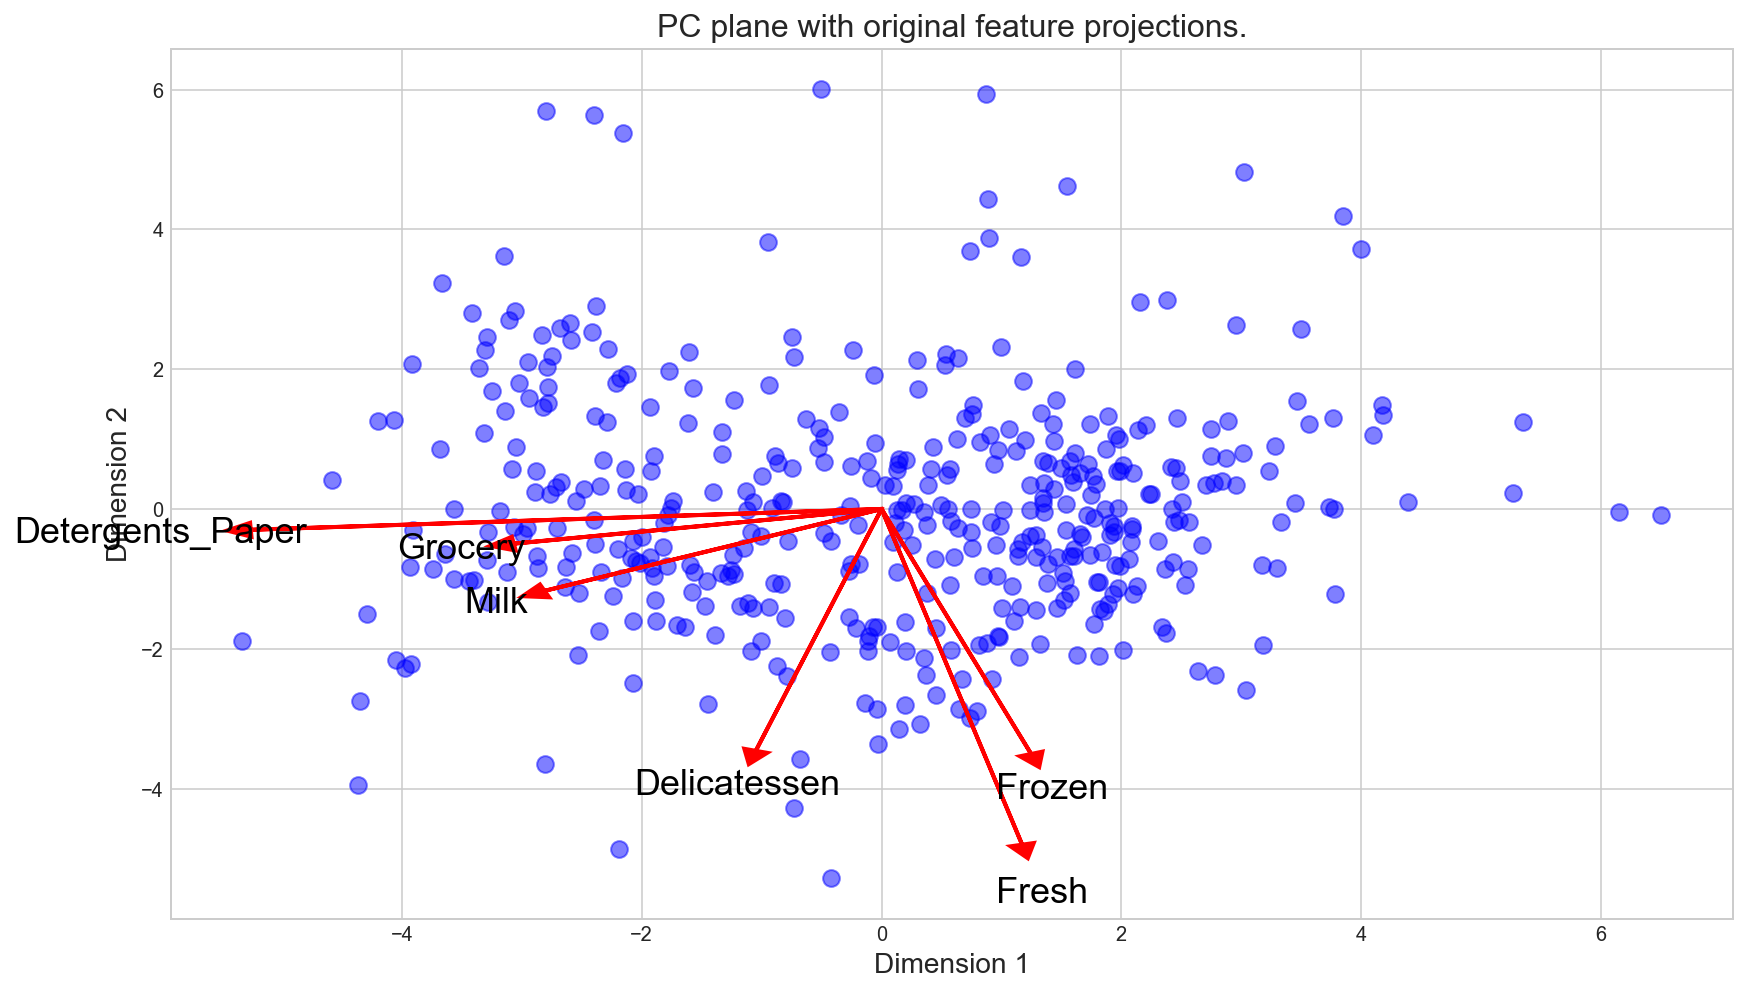

In [33]:
biplot(good_data, reduced_data, pca);

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

## 5. Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.  

#### Question 6: K-Means or Gaussian Mixture Model?

*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

From what we know of both models.

Advantages of K-Means clustering: 

- Simple, easy to implement and interpret results.
- Good for hard cluster assignments i.e. when a data point only belongs to one cluster over the others.

Advantages of Gaussian Mixture Model clustering: 

- Good for estimating soft clusters i.e. we're not sure if a point belongs to one cluster over another.
- GMM provides more information about every data point because it assigns a soft clustering label (probabilities of for each cluster label).
- Does not bias the cluster sizes to have specific structures in the cluster that may or may not exist. K-Means constraints clusters to have only globular sizes. GMM clusters can be ellipsoidal or globular.

Gven what we know about the wholesale customer data so far, we'll chose to use Gaussian Mixture Model clustering over K-Means. This is because there might be some hidden patterns in the data that we may miss by assigning only one cluster to each data point. For example, let's take the case of the Supermarket customer in our sample: while doing PCA, it had similar and high positive weights for multiple dimensions, i.e. it didn't belong to one dimension over the other. So a supermarket may be a combination of a fresh produce store/grocery store/frozen goods store.

We'll choose GMM, so that we don't miss cases like these. But we will evaluate both K-Means and GMM below. 

### Creating Clusters

Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data - if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *`silhouette coefficient`*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *`mean silhouette coefficient`* provides for a simple scoring method of a given clustering.

### Quantifying the quality of clustering via silhouette plots
**silhouette score:**  
An intrinsic metric to evaluate the quality of a clustering is **silhouette analysis**, which can also be applied to clustering algorithms other than k-means. Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. To calculate the `silhouette coefficient` of a single sample in our dataset, we can apply the following three steps:
1. Calculate the cluster cohesion $a^{(i)}$ as the average distance between a sample $xa^{(i)}$ and all other points in the same cluster.
2. Calculate the cluster separation $b^{(i)}$ from the next closest cluster as the average distance between the sample $xa^{(i)}$ and all samples in the nearest cluster.
3.Calculate the silhouette $s^{(i)}$ as the difference between cluster cohesion and separation divided by the greater of the two, as shown here:

\begin{align}
s^{(i)}=\frac{b^{(i)} - a^{(i)}}{max\{b^{(i)} - a^{(i)}\}}
\end{align}

The silhouette coefficient is bounded in the range -1 to 1. Based on the preceding formula, we can see that the silhouette coefficient is 0 if the cluster separation and cohesion are equal $(b^{(i)} = a^{(i)})$. Furthermore, we get close to an ideal silhouette coefficient of 1 if $b^{(i)} >> a^{(i)}$, since $b^{(i)}$ quantifies how dissimilar a sample is to other clusters, and $a^{(i)}$ tells us how similar it is to the other samples in its own cluster, respectively.

**inertia:**
Another intuitive measure of similarity between objects in a cluster is called inertia. We can define similarity as the opposite of distance, and a commonly used distance for clustering samples with continuous features is the **squared Euclidean distance** between two points $x$ and $y$ in `m-dimensional space`:

\begin{align}
d(x, y)^2 = \sum_{j=1}^{m}(x_j - y_j)^2 = \parallel x - y\parallel_{2}^{2}
\end{align}

Note that, in the preceding equation, the index $j$ refers to the $j^{th}$ dimension (feature column) of the sample points $x$ and $y$.

Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the **within-cluster sum of squared errors (SSE)**, which is sometimes also called **cluster inertia**:

\begin{align}
SSE = \sum_{i=1}^{n}\sum_{j=1}^{k}w^{(i, j)}\parallel x - y\parallel_{2}^{2}
\end{align}

Here, $\mu^j$ is the representative point (centroid) for cluster $j$, and $w^{(i, j)} = 1$ if the sample $x^{(i)}$ is in cluster $j$; $w^{(i, j)} = 0$ otherwise.

The silhouette coefficient is available as `silhouette_samples` from scikit-learn's `metric` module, and optionally the `silhouette_scores` can be imported. This calculates the average silhouette coefficient across all samples, which is equivalent to `numpy.mean(silhouette_samples(…))`.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

### 5.1. Implementation: Creating Clusters with K-Means

The classic k-means algorithm that uses a random seed to place the initial centroids can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly. One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the best performing model in terms of the SSE. Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.

The initialization in k-means++ can be summarized as follows:
1. Initialize an empty set $M$ to store the $k$ centroids being selected.
2. Randomly choose the first centroid $\mu^j$ from the input samples and assign it to $M$.
3. For each sample $x^{(i)}$ that is not in $M$, find the minimum squared distance $d(x^{(i)}, M)^2$, to any of the centroids in $M$.
4. To randomly select the next centroid $\mu^{(p)}$, use a weighted probability distribution equal to
\begin{align}
SSE = \frac{d(\mu^{(p)}, M)^2}{\sum_i d(x^{(i)}, M)^2}
\end{align}
5. Repeat steps 2 and 3 until $k$ centroids are chosen.
6. Proceed with the classic k-means algorithm.

**Analyse the Silhouette Scores:**

We set `n_init=10` to run the k-means clustering algorithms 10 times independently with different `k-means++` centroids to choose the final model as the one with the lowest silhouette_score. Via the `max_iter` parameter, we specify the maximum number of iterations for each single run (here, 300).

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
distortions = []

n_clusters = list(range(2,10))
for k in n_clusters:
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=rnd_seed)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.fit_predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    sh_score = silhouette_score(reduced_data, preds, metric='euclidean')
    silhouette_scores.append(sh_score)
    
    # Calculatete the intracluster SSE
    sse = clusterer.inertia_
    distortions.append(sse)
    
    print("TFor {} clusters: silhouette_score = {}, SSE = {}".format(k, sh_score, sse))

TFor 2 clusters: silhouette_score = 0.4262810154691084, SSE = 1732.9179322430064
TFor 3 clusters: silhouette_score = 0.3889859252483241, SSE = 1289.4961774565786
TFor 4 clusters: silhouette_score = 0.3325819759999959, SSE = 1004.9750835621546
TFor 5 clusters: silhouette_score = 0.35099077893126523, SSE = 831.1360848668871
TFor 6 clusters: silhouette_score = 0.3655171052587634, SSE = 691.7911521269284
TFor 7 clusters: silhouette_score = 0.3648753591099507, SSE = 588.5539505531341
TFor 8 clusters: silhouette_score = 0.35563027145453135, SSE = 518.3775694144631
TFor 9 clusters: silhouette_score = 0.3639185753660781, SSE = 462.72973409881314


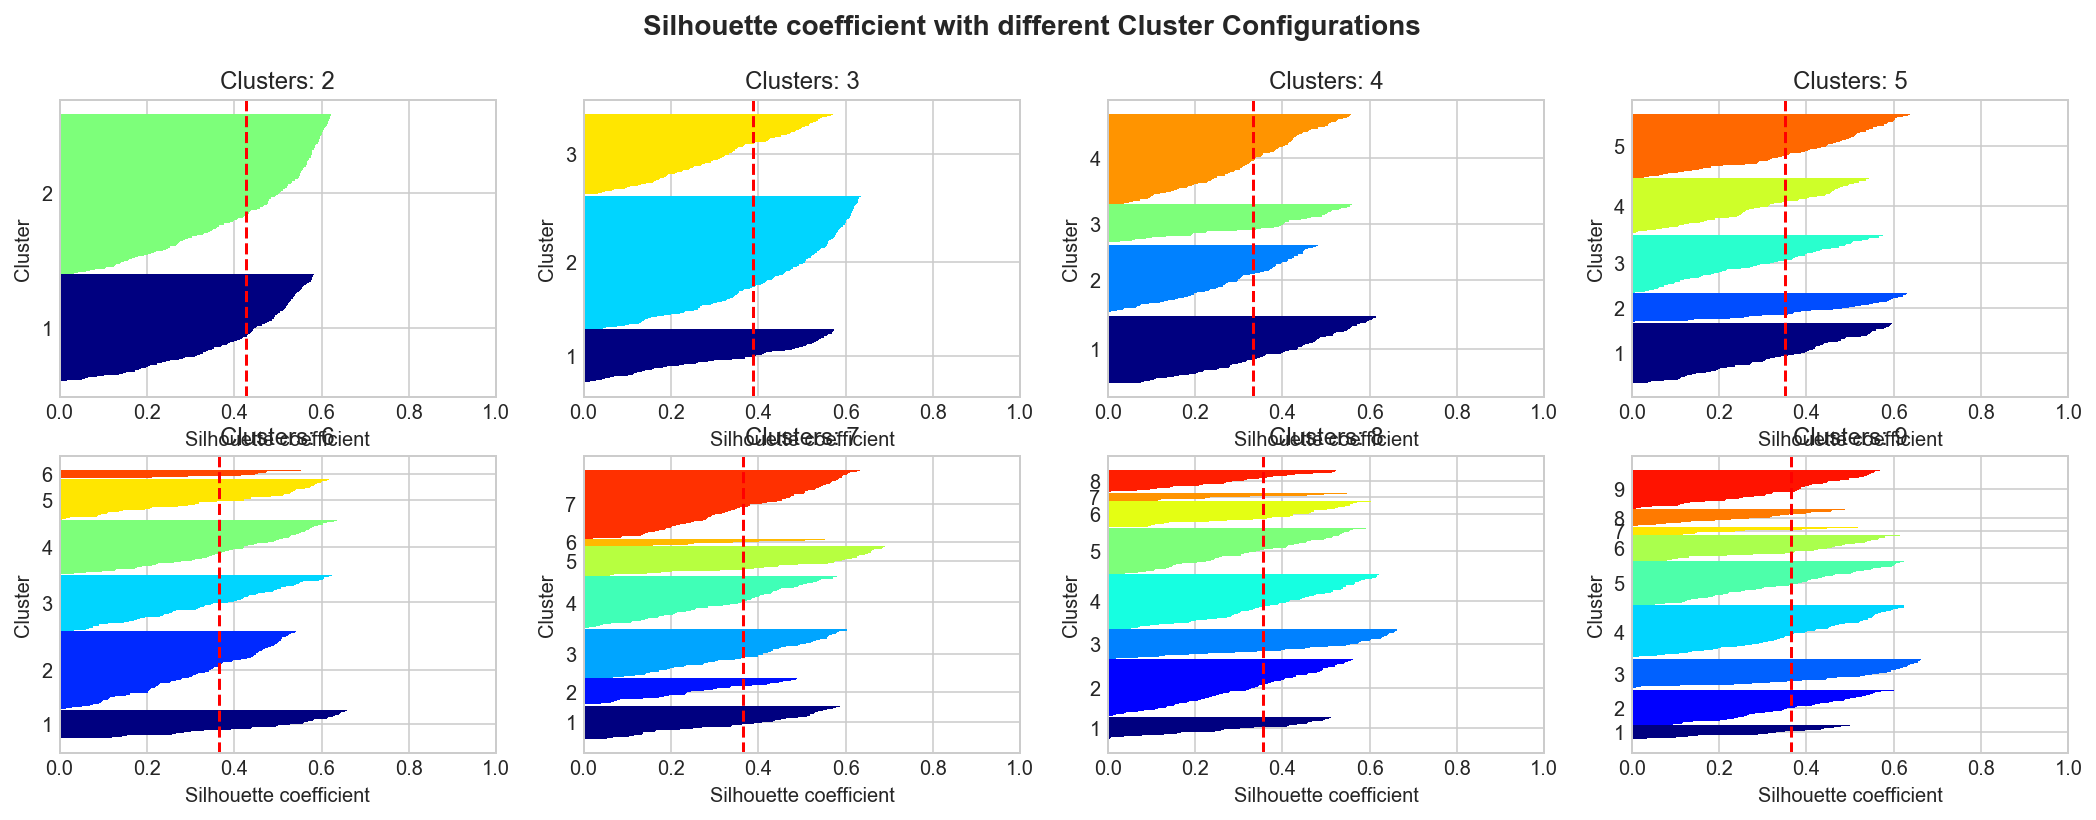

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from matplotlib import cm

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 6))
axes = axes.flatten()

n_clusters = list(range(2,10))
for ax, k in enumerate(n_clusters):
    km = KMeans(n_clusters=k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_seed)
    
    preds = km.fit_predict(reduced_data)
    
    cluster_labels = np.unique(preds)
    
    silhouette_vals = silhouette_samples(reduced_data, preds, metric='euclidean')
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[preds == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / k)
        _= axes[ax].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    _= axes[ax].axvline(silhouette_avg, color="red", linestyle="--") 
    _= axes[ax].set(ylabel='Cluster', xlabel='Silhouette coefficient', title='Clusters: {0}'.format(k), xlim=(0, 1))
    _= axes[ax].set_yticks(yticks)
    _= axes[ax].set_yticklabels(cluster_labels + 1)
    
fig.suptitle('Silhouette coefficient with different Cluster Configurations', fontsize=14, fontweight='bold');

As we can see in the preceding silhouette plot, our silhouette coefficients are not even close to 0, which can be an indicator of a good clustering. Furthermore, to summarize the goodness of our clustering, we added the average silhouette coefficient to the plot (dotted line).

**Find Best K using Elbow Method:**

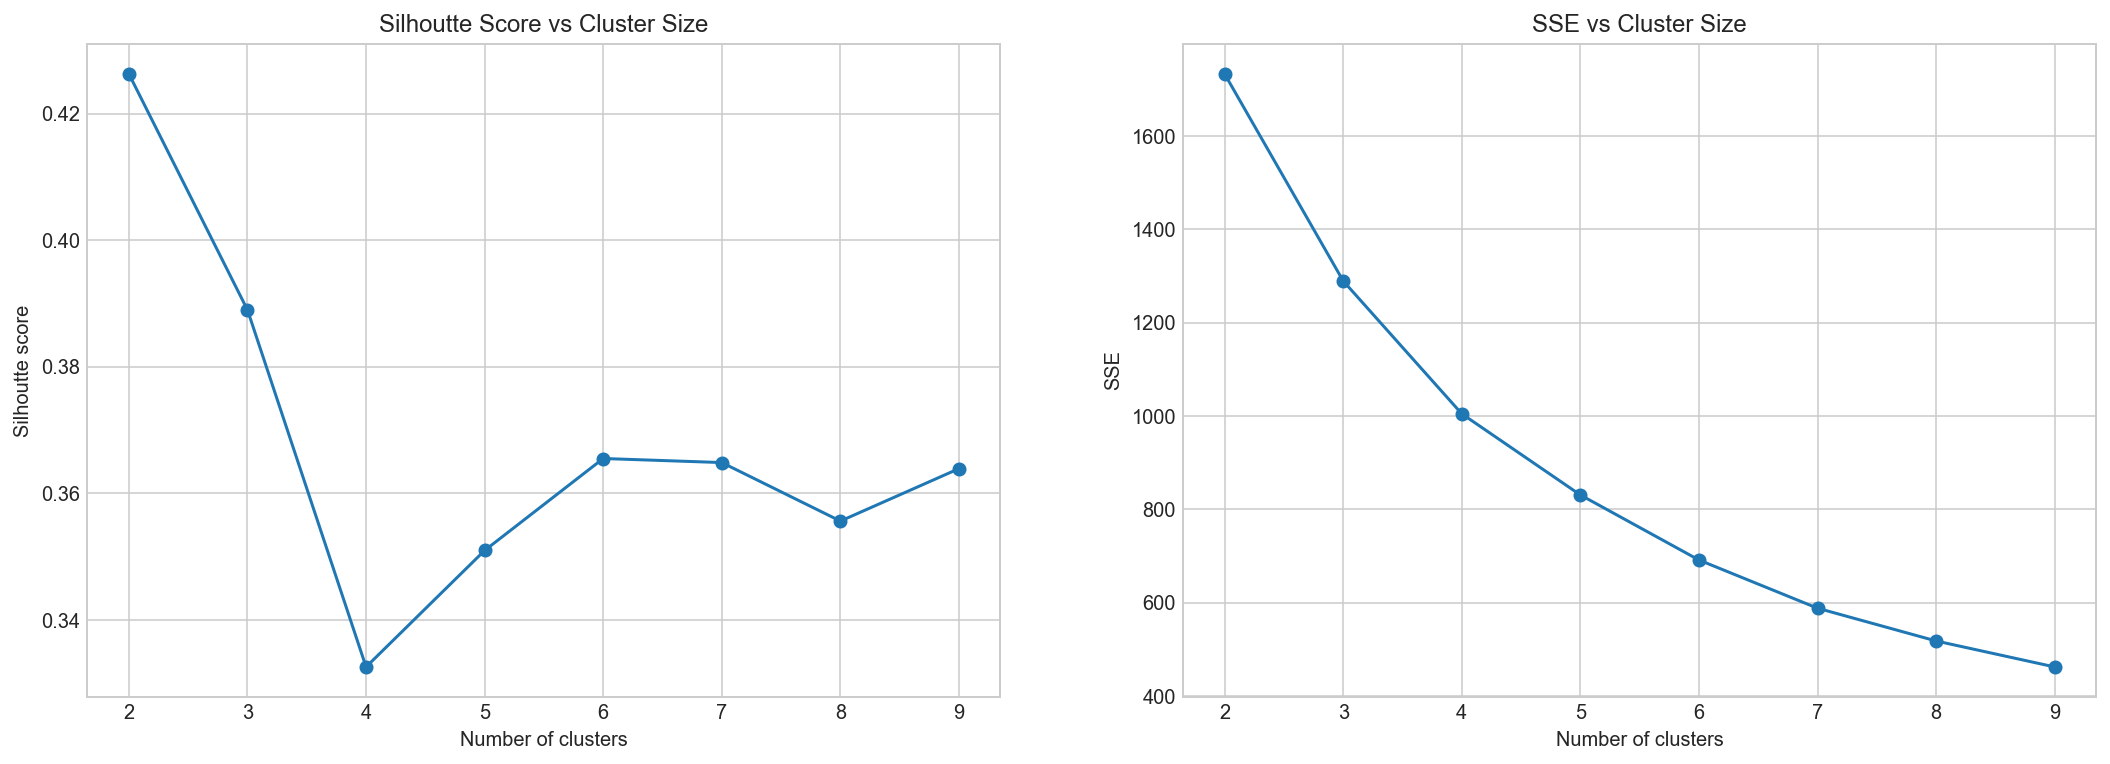

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes[0].plot(n_clusters, silhouette_scores, marker='o')
axes[0].set(xlabel='Number of clusters', ylabel='Silhoutte score', title='Silhoutte Score vs Cluster Size')
axes[1].plot(n_clusters, distortions, marker='o')
axes[1].set(xlabel='Number of clusters', ylabel='SSE', title='SSE vs Cluster Size');

#### Finalize Number of K-Means Clusters

**Observation**  

We observe that with K=2 we get the best silhouette score. Hence we select a a K-Means model with K=2 as our final model.

In [37]:
clusterer = KMeans(n_clusters=2, random_state=rnd_seed).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_

#### 5.1.1. Cluster Visualization

In [38]:
import matplotlib.cm as cm

def cluster_results(reduced_data, preds, centers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (10,10))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
            color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);
    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
            alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
        s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

#### 5.1.2. K-Means Cluster Visualization

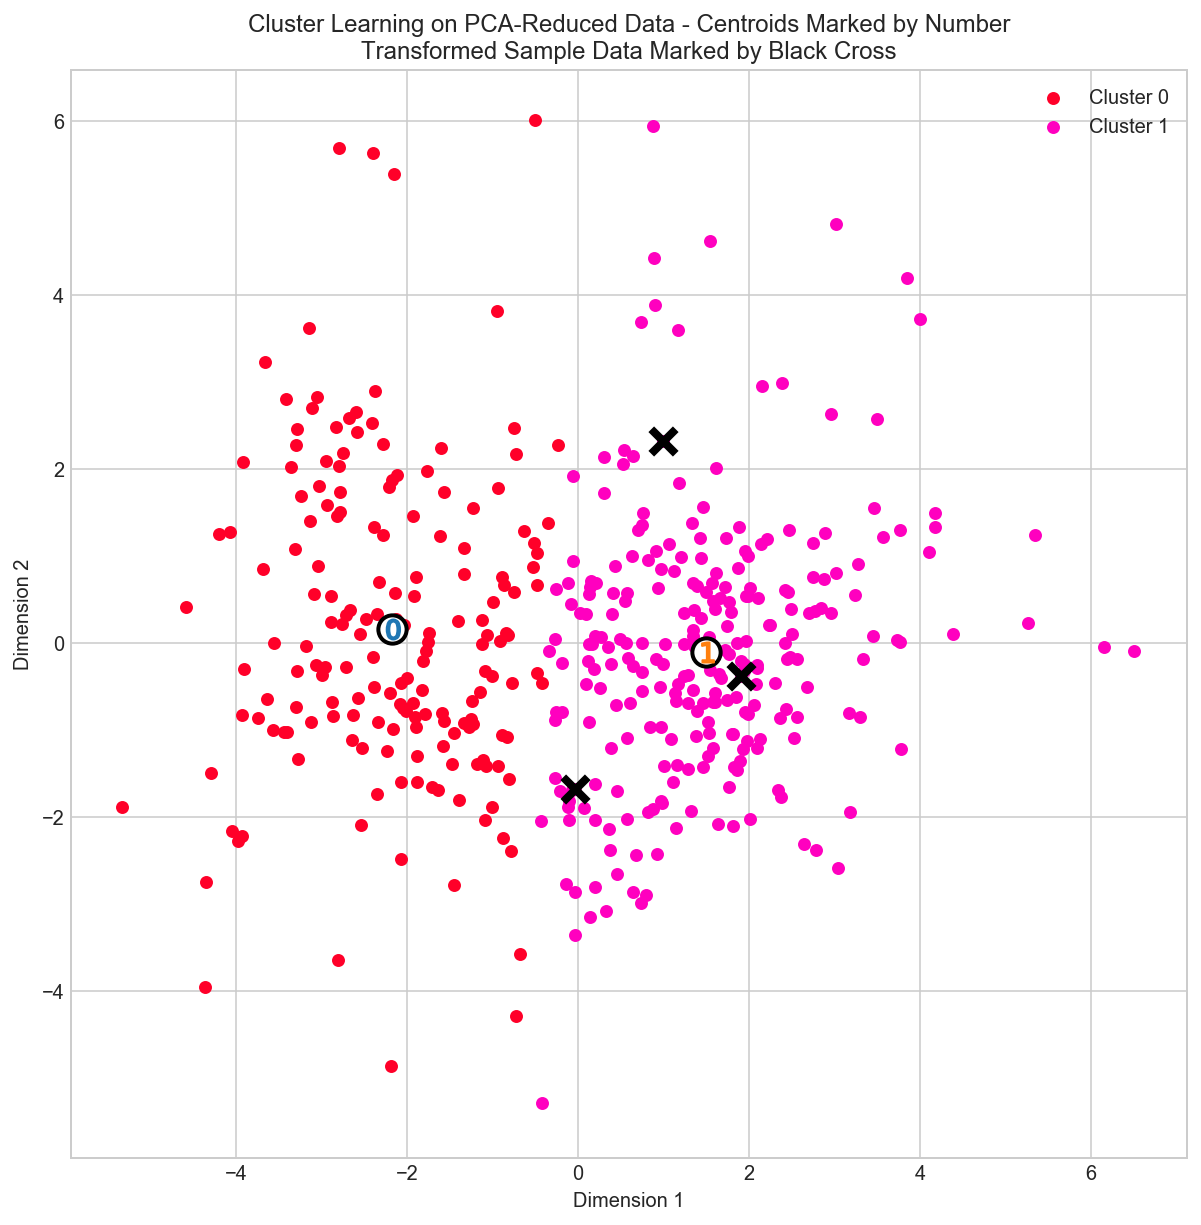

In [39]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

### 5.2. Implementation: Creating Clusters with GaussianMixture

In [40]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n_clusters = [8,6,4,3,2]
silhouette_scores = []

for n in n_clusters:
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    silhouette_scores.append(score)
    
    print("The silhouette_score for {} clusters is {}".format(n,score))

The silhouette_score for 8 clusters is 0.31901769827587306
The silhouette_score for 6 clusters is 0.23005241059949075
The silhouette_score for 4 clusters is 0.35919388578619643
The silhouette_score for 3 clusters is 0.40318239969525027
The silhouette_score for 2 clusters is 0.4219168464626149


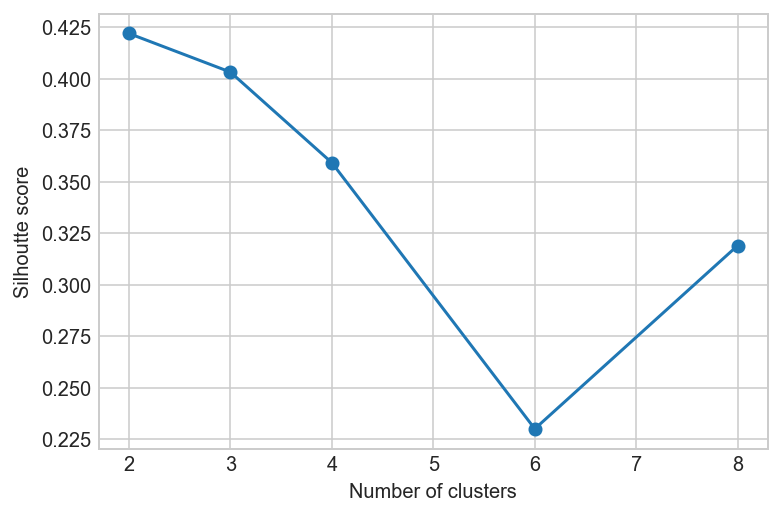

In [41]:
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte score");

#### Question 7: Finalize Number of Clusters

*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer**
We observe that with n=2 we get the best silhouette score. Hence we select a a GMM model with n=2 as our final model.

In [42]:
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_

#### 5.2.1. GMM Cluster Visualization

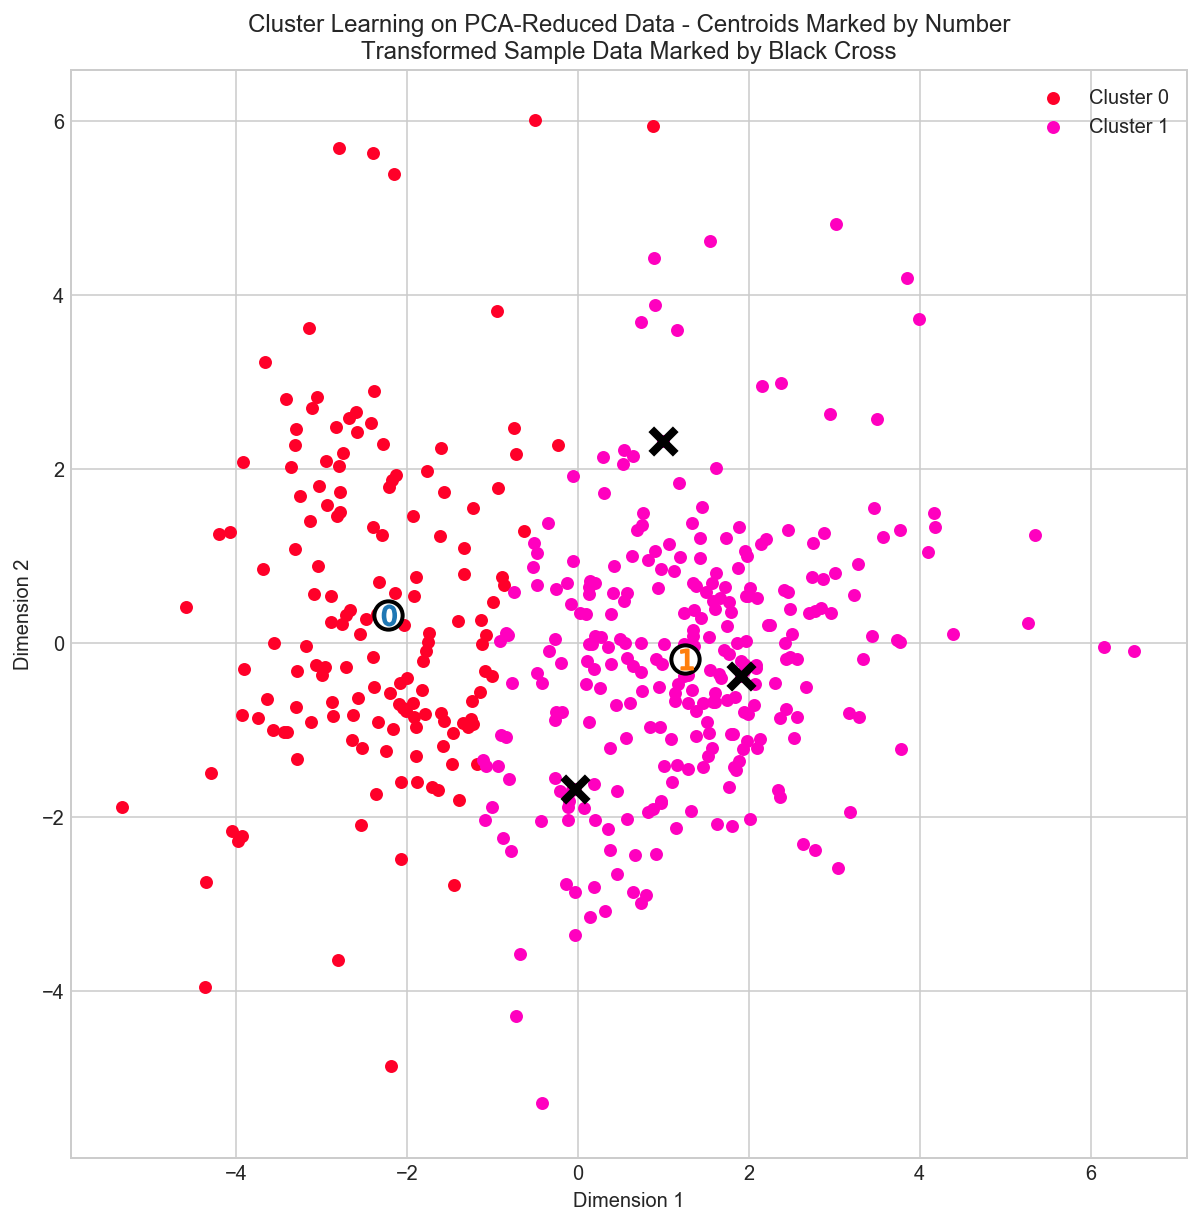

In [43]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

### 5.2. Data Recovery

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.

In [44]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


#### Question 8:

An interesting observation here could be, consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [45]:
# Display a description of the dataset
good_data.applymap(lambda x: np.exp(x)).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,12089.372414,5788.103448,7911.158621,3096.126437,2848.473563,1536.797701
std,12662.796341,7374.172350,9365.740973,4873.769559,4679.364623,2833.363881
min,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,3208.000000,1579.500000,2156.000000,770.500000,260.000000,411.500000
50%,8565.000000,3634.000000,4757.000000,1541.000000,813.000000,967.000000
75%,16934.500000,7168.000000,10665.500000,3559.500000,3935.000000,1825.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Taking an educated guess,

- **Segment 0**: This segment best represents supermarkets. They spend a higher than median amount on Milk, Grocery, Detergents_Paper and Deli, which are both essential to be stocked in such places.

- **Segment 1**: This segment best represents restaurants. Their spend on Fresh, and Frozen is higher than the median, and lower, but still close to median on Deli. Their spend on Milk, Grocery and Detergents_Paper is lower than median, which adds to our assessment. 

#### Question 9:

*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [46]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [47]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9898,961,2861,3151,242,833
1,45640,6958,6536,7368,1532,230
2,518,4180,3600,659,122,654


Our guesses for Sample points 0,1, and 2 were restaurants, supermarket and cafe. It seems like we're close on the predictions for sample points 0 and 2, while incorrect, or rather inconsistent, with our predictions for sample point 1. Looking at the visualization for our cluster in the previous section, it could be that sample 1 is the point close to the boundary of both clusters.

## Conclusion and Implications: How to use this knowledge?

In this final section, we will investigate ways that you can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Then, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data.

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

#### How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

Making the change to the delivery service means that products will be delivered fewer times in a week. 

The wholesale distributor can identify the clusters to conduct the A/B test on, but the test should be done on one cluster at a time because the two clusters represent different types of customers, so their delivery needs might be different, and their reaction to change will, thus, be different. In other words, the control and experiment groups should be from the same cluster, at a time.

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  

#### How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?

To label the new customers, the distributor will first need to build and train a supervised learner on the data that we labeled through clustering. The data to fit will be the estimated spends, and the target variable will be the customer segment i.e. 0 or 1 (i.e. grocery store or restaurant). They can then use the classifier to predict segments for new incoming data.